In [2]:
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
file_path = '../dane/data_collection_20231202114746.csv' # ostatni strzał zerwany
df = pd.read_csv(file_path)

print(df.head())


   Index   V1   V2  Noise
0      0  337  282    313
1      1  345  278    290
2      2  354  279    283
3      3  365  295    291
4      4  377  313    303


Pokaz dla próbki, w której piąty strzał jest zerwany

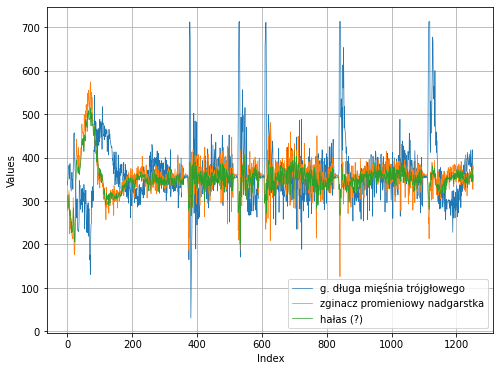

In [8]:
plt.figure(figsize=(8, 6))  

plt.plot(df['Index'], df['V1'], label='G. długa mięśnia trójgłowego', linewidth=0.7)
plt.plot(df['Index'], df['V2'], label='Zginacz promieniowy nadgarstka', linewidth=0.7)
plt.plot(df['Index'], df['Noise'], label='Szum', linewidth=0.7)

plt.xlabel('Index')
plt.ylabel('Values')

plt.legend() 
plt.grid()  
plt.show()


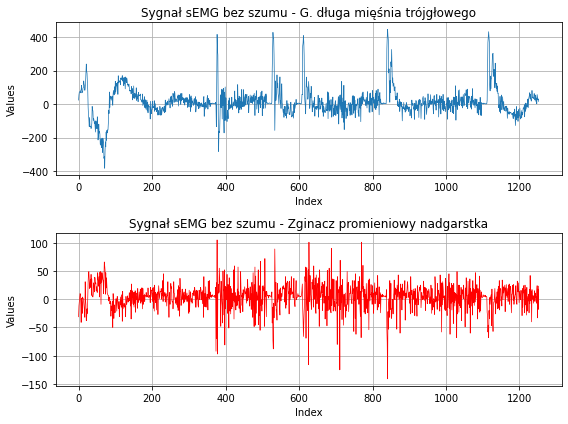

In [17]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(df['Index'], df['V1'] - df['Noise'], label='G. długa mięśnia trójgłowego', linewidth=0.7)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Sygnał sEMG bez szumu - G. długa mięśnia trójgłowego')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df['Index'], df['V2'] - df['Noise'], label='Zginacz promieniowy nadgarstka', linewidth=0.7, color='red')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Sygnał sEMG bez szumu - Zginacz promieniowy nadgarstka')
plt.grid()

plt.tight_layout()
plt.show()

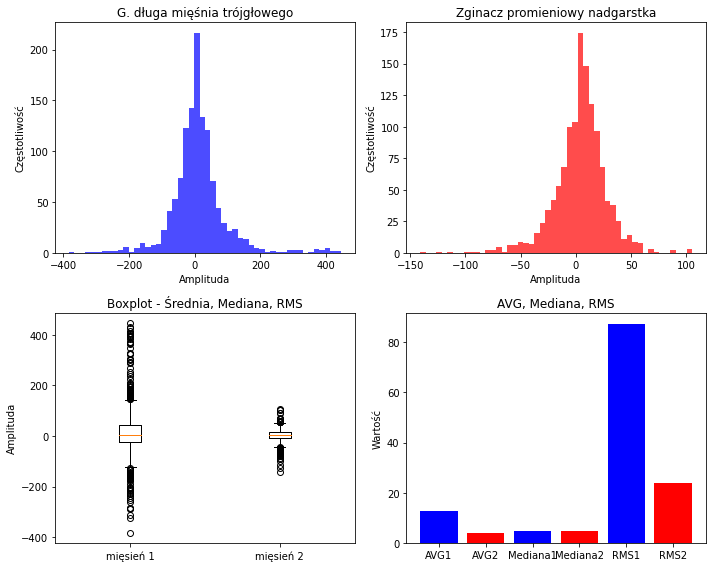

In [18]:
import numpy as np

channel_1 = df['V1'] - df['Noise']
channel_2 = df['V2'] - df['Noise']

mean_channel_1 = channel_1.mean()
median_channel_1 = channel_1.median()
std_channel_1 = channel_1.std()

rms_channel_1 = np.sqrt(np.mean(np.square(channel_1)))

mean_channel_2 = channel_2.mean()
median_channel_2 = channel_2.median()
rms_channel_2 = np.sqrt(np.mean(np.square(channel_2)))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(channel_1, bins=50, alpha=0.7, color='blue')
axes[0, 0].set_title('G. długa mięśnia trójgłowego')
axes[0, 0].set_xlabel('Amplituda')
axes[0, 0].set_ylabel('Częstotliwość')

axes[0, 1].hist(channel_2, bins=50, alpha=0.7, color='red')
axes[0, 1].set_title('Zginacz promieniowy nadgarstka')
axes[0, 1].set_xlabel('Amplituda')
axes[0, 1].set_ylabel('Częstotliwość')

data = [channel_1, channel_2]
labels = ['mięsień 1', 'mięsień 2']
axes[1, 0].boxplot(data, labels=labels)
axes[1, 0].set_title('Boxplot - Średnia, Mediana, RMS')
axes[1, 0].set_ylabel('Amplituda')

statistics = [mean_channel_1, mean_channel_2, median_channel_1, median_channel_2, rms_channel_1, rms_channel_2]
labels = ['AVG1', 'AVG2', 'Mediana1', 'Mediana2', 'RMS1', 'RMS2']
axes[1, 1].bar(labels, statistics, color=['blue', 'red', 'blue', 'red', 'blue', 'red'])
axes[1, 1].set_title('AVG, Mediana, RMS')
axes[1, 1].set_ylabel('Wartość')

plt.tight_layout()
plt.show()

# Display or use these calculated statistics as required
# print("Mean:", mean_value)
# print("Median:", median_value)
# print("Standard Deviation:", std_deviation)
# print("RMS:", rms_value)
# print("Peak Amplitude:", peak_amplitude)
# print("Dominant Frequency:", dominant_frequency)
# print("Spectral Bandwidth:", spectral_bandwidth)

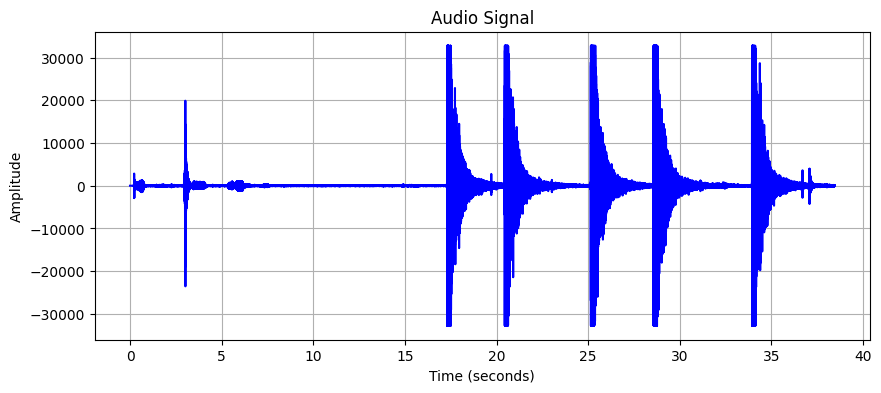

In [6]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np

file_path = '../audio/212-1208-7.aac'
audio = AudioSegment.from_file(file_path, format="aac")
audio_data = np.array(audio.get_array_of_samples())

duration = len(audio_data) / audio.frame_rate
time = np.linspace(0, duration, len(audio_data))

plt.figure(figsize=(10, 4))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.grid(True)
plt.show()
